In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
files = os.listdir('riviera42_data')

In [26]:
files

['.ipynb_checkpoints',
 'cheqdet.csv',
 'cheques.csv',
 'chequespagos.csv',
 'clientes.csv',
 'colonias.csv',
 'direccionesdomicilio.csv',
 'formasdepago.csv',
 'grupos.csv',
 'gruposmodificadores.csv',
 'gruposmodificadoresproductos.csv',
 'grupossubgrupos.csv',
 'modificadores.csv',
 'Month.csv',
 'PaymentMethod.csv',
 'Periodicity.csv',
 'productos.csv',
 'productosdetalle.csv',
 'promociones.csv',
 'subgrupos.csv',
 'subgruposproductos.csv']

In [27]:
cheques = pd.read_csv('riviera42_data/cheques.csv', index_col=False)

In [28]:
direccionesdomicilio = pd.read_csv('riviera42_data/direccionesdomicilio.csv', index_col=False)

In [29]:
colonias = pd.read_csv('riviera42_data/colonias.csv', index_col=False)

In [30]:
clientes = pd.read_csv('riviera42_data/clientes.csv', index_col=False)

In [31]:
cheques

,folio,fecha,nopersonas,cambio,descuento,idcliente,tipodeservicio,total,efectivo,tarjeta,totalalimentos,totalbebidas
0,1,2018-02-01 16:13:38.000,8,0.0,0.0,NaN,1,825.0,825.0,0.0,551.7241,159.4828
1,2,2018-02-01 19:56:38.000,1,0.0,0.0,NaN,1,85.0,85.0,0.0,51.7241,21.5517
2,3,2018-02-01 20:28:14.000,1,0.0,0.0,NaN,1,120.0,120.0,0.0,81.8966,21.5517
3,4,2018-02-01 20:33:06.000,1,0.0,0.0,NaN,1,490.0,0.0,539.0,336.2069,86.2069
4,5,2018-02-01 20:59:32.000,1,0.0,0.0,NaN,1,600.0,0.0,600.0,344.8276,172.4138
...,...,...,...,...,...,...,...,...,...,...,...,...
49733,51218,2022-03-12 20:42:15.000,1,0.0,0.0,006446,2,220.0,220.0,0.0,189.6552,0.0000
49734,51219,2022-03-12 20:46:26.000,1,0.0,0.0,001082,2,280.0,280.0,0.0,241.3793,0.0000
49735,51220,2022-03-12 20:48:10.000,1,0.0,0.0,002714,2,280.0,280.0,0.0,241.3793,0.0000
49736,51221,2022-03-12 21:00:15.000,8,0.0,0.0,NaN,1,940.0,0.0,1034.0,491.3793,318.9655


In [32]:
direcciones = direccionesdomicilio

In [33]:
pedidos = cheques.join(direcciones[['idcliente','idcolonia']].set_index('idcliente'),on='idcliente').join(colonias.set_index('idcolonia')['descripcion'],on='idcolonia',lsuffix='col')

In [34]:
'''
plt.pie(ef_y_t, shadow=True, labels =['Efectivo','Tarjeta'],autopct= lambda pct: f'{pct:.1f}%')
plt.title('Riviera 42: Ventas Efectivo vs Tarjeta')
plt.show()
'''

"\nplt.pie(ef_y_t, shadow=True, labels =['Efectivo','Tarjeta'],autopct= lambda pct: f'{pct:.1f}%')\nplt.title('Riviera 42: Ventas Efectivo vs Tarjeta')\nplt.show()\n"

In [35]:
clientes = clientes.drop('direccion',axis=1)

In [36]:
clientes = clientes.join(direcciones.set_index('idcliente'), on='idcliente')

In [37]:
domicilio = pedidos[pedidos.tipodeservicio == 2]

In [39]:
clientes[clientes.idcliente=='001841']

,idcliente,nombre,telefono1,telefono2,iddireccion,idcolonia,calle,numeroexterior,numerointerior,cruzamiento1,cruzamiento2,codigopostal,referencia
1835,001841,RODRIGO NOYA,2293653336,NaN,CASA,64.0,AVENIDA LA MATOZA TORRE RIVIERA 504,17,DEP 504,NaN,NaN,NaN,NaN


In [40]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7209 entries, 0 to 7141
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idcliente       7209 non-null   object 
 1   nombre          7209 non-null   object 
 2   telefono1       6852 non-null   object 
 3   telefono2       37 non-null     object 
 4   iddireccion     6871 non-null   object 
 5   idcolonia       6861 non-null   float64
 6   calle           6869 non-null   object 
 7   numeroexterior  6669 non-null   object 
 8   numerointerior  535 non-null    object 
 9   cruzamiento1    975 non-null    object 
 10  cruzamiento2    279 non-null    object 
 11  codigopostal    29 non-null     object 
 12  referencia      1237 non-null   object 
dtypes: float64(1), object(12)
memory usage: 788.5+ KB


In [41]:
fracs_total_domicilio = domicilio[(~domicilio.descripcion.isin(['TOGO','PLAZA RIVIERA','CARR RIVIERA VERACRUZANA']))].groupby(['descripcion'])[['total']].sum()

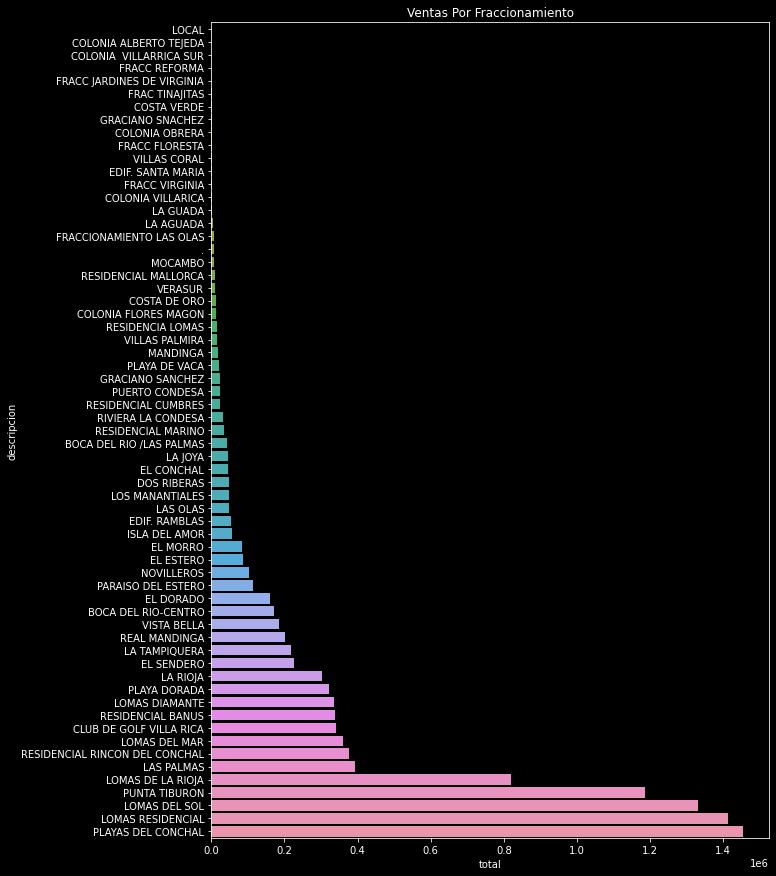

In [42]:
fig, ax = plt.subplots(figsize=(10,15))
ax = sns.barplot(x="total", y=fracs_total_domicilio.index, data=fracs_total_domicilio, estimator=sum, order=fracs_total_domicilio.sort_values('total', ascending=True).index)
plt.title('Ventas Por Fraccionamiento')
plt.style.use('dark_background')
plt.show()

In [47]:
pedidos.fecha = pd.to_datetime(pedidos.fecha)

In [48]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51312 entries, 0 to 49737
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   folio           51312 non-null  int64         
 1   fecha           51312 non-null  datetime64[ns]
 2   nopersonas      51312 non-null  int64         
 3   cambio          51312 non-null  float64       
 4   descuento       51312 non-null  float64       
 5   idcliente       44051 non-null  object        
 6   tipodeservicio  51312 non-null  int64         
 7   total           51312 non-null  float64       
 8   efectivo        51312 non-null  float64       
 9   tarjeta         51312 non-null  float64       
 10  totalalimentos  51312 non-null  float64       
 11  totalbebidas    51312 non-null  float64       
 12  idcolonia       41365 non-null  float64       
 13  descripcion     41365 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(2)


In [49]:
ventas = pedidos.copy()

In [73]:
ventas_diarias = ventas.groupby('fecha').sum().resample('D').agg('sum')

In [70]:
visitas_mensuales = ventas[ventas.tipodeservicio==1].groupby('fecha').sum().resample('M').agg('sum')

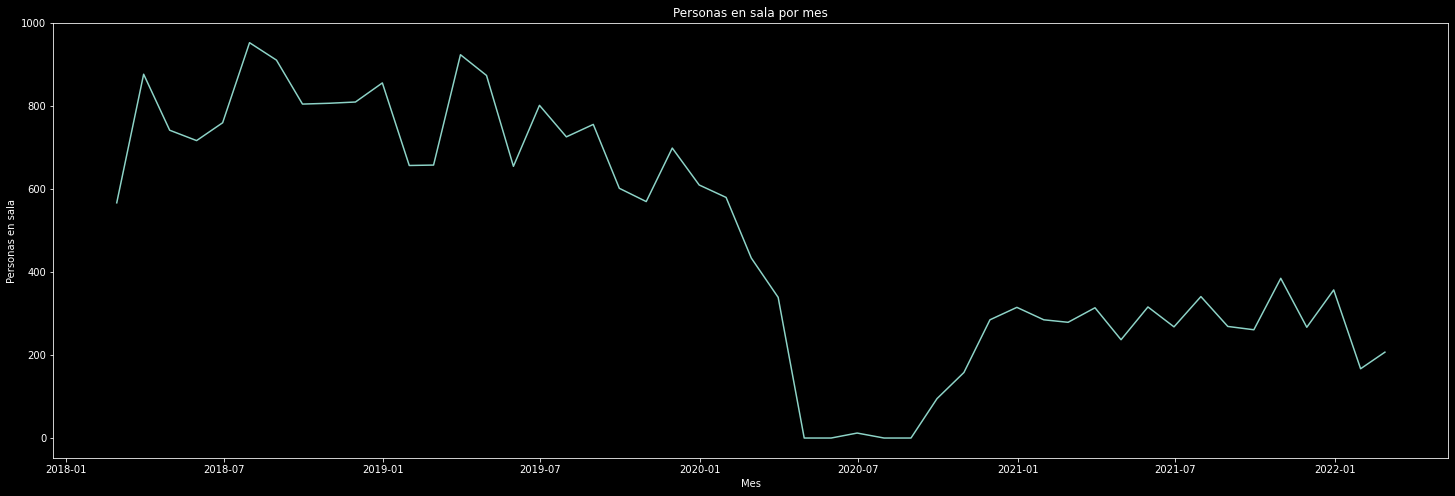

In [76]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(visitas_mensuales.index[:-1],visitas_mensuales.nopersonas[:-1])
plt.xlabel('Mes')
plt.ylabel('Personas en sala')
plt.title('Personas en sala por mes')
plt.show()

In [86]:
ventas_mensuales_promedio = ventas.groupby('fecha').mean().resample('M').agg('mean')

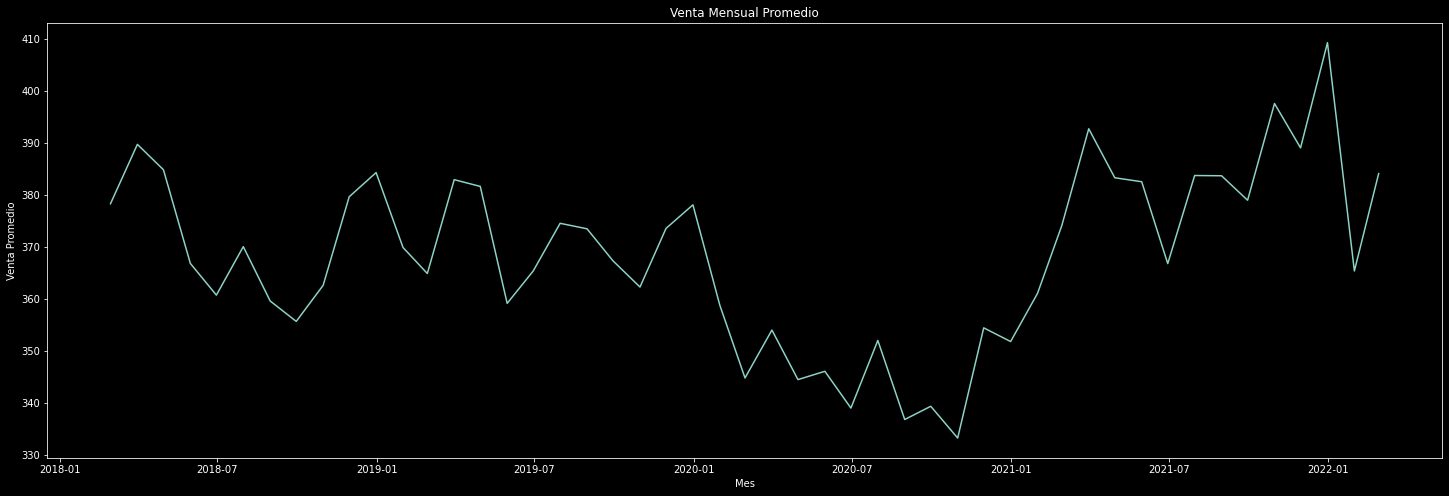

In [102]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales_promedio.index[:-1],ventas_mensuales_promedio.total[:-1])
plt.xlabel('Mes')
plt.ylabel('Venta Promedio')
plt.title('Venta Mensual Promedio')
plt.show()

In [97]:
ventas_mensuales = ventas.groupby('fecha').sum().resample('M').agg('sum')

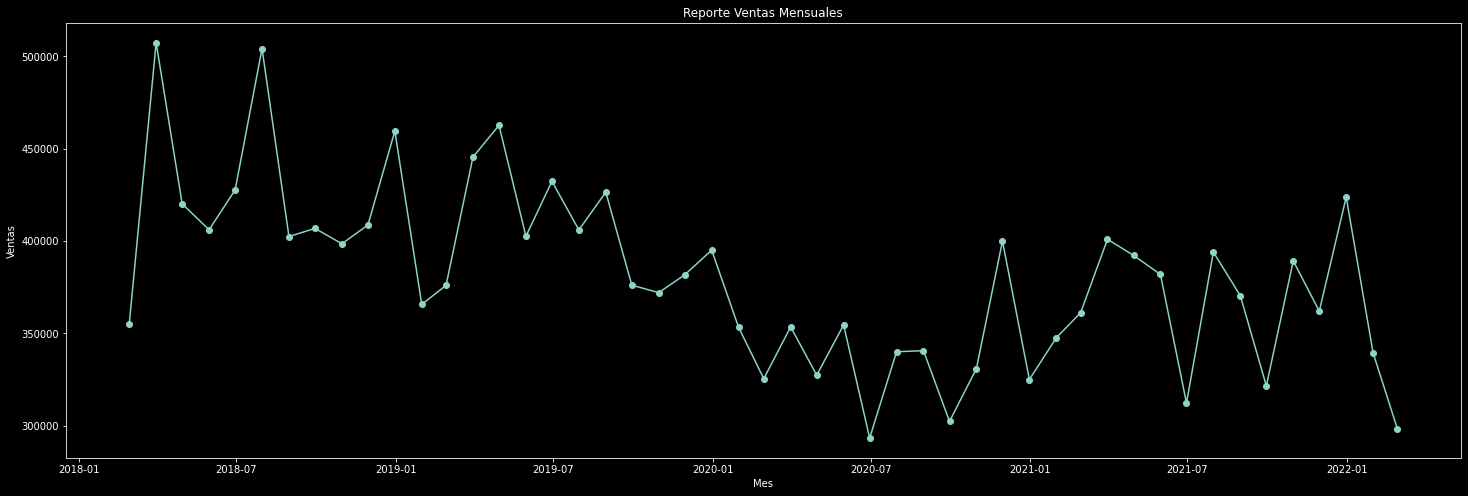

In [101]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales.index[:-1],ventas_mensuales.total[:-1],marker='o')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Reporte Ventas Mensuales')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (25,8))
ax = plt.plot(ventas_mensuales.index[:-1],ventas_mensuales.nopersonas[:-1])
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Reporte Ventas Mensuales')
plt.show()

In [100]:
ventas_mensuales

,folio,nopersonas,cambio,descuento,tipodeservicio,total,efectivo,tarjeta,totalalimentos,totalbebidas,idcolonia
fecha,,,,,,,,,,,
2018-02-28,453452,1205,19810.0,1800.0,1852,355005.0,278193.50,81321.00,254327.5878,50374.9986,5257.0
2018-03-31,2125831,2005,32904.0,1500.0,2499,507442.5,388966.00,119733.20,371540.9489,64004.3090,10503.0
2018-04-30,3115909,1490,513467.0,1100.0,2001,420120.0,311278.50,109767.25,307870.6903,52146.5495,9052.0
2018-05-31,4396401,1525,31847.0,1120.0,2100,406090.0,307760.00,98938.00,305965.5203,41810.3436,10108.0
2018-06-30,6098383,1638,46182.5,1105.0,2200,427651.0,340799.00,89032.00,321793.9670,44405.1712,13514.0
2018-07-31,8795794,2002,38675.0,1600.0,2540,504235.0,401559.50,106189.25,377762.9324,53672.4129,19029.0
2018-08-31,8625626,1736,284834.0,1500.0,2025,402425.0,302707.00,97192.85,300525.8651,43693.9638,16750.0
2018-09-30,10146688,1682,43364.0,1100.0,2051,406835.0,314113.50,96190.25,305870.6911,38331.8953,21812.0
2018-10-31,11027095,1652,92243.0,320.0,1970,398509.0,301115.00,102302.30,300546.5573,36314.6542,21041.0
